#Installing Dependencies

In [ ]:
!pip install pydicom
!pip install albumentations==0.4.6
!pip install nilearn
!pip install nipype
! pip install gdown
!pip install SimpleITK

     |████████████████████████████████| 1.9 MB 4.0 MB/s 
     |████████████████████████████████| 117 kB 4.0 MB/s 
     |████████████████████████████████| 948 kB 17.8 MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-py3-none-any.whl size=65173 sha256=755b18d1c700c5bd08e8e3091e6c744632eb0bf085897b24a41c268760faac5a
  Stored in directory: /root/.cache/pip/wheels/cf/34/0f/cb2a5f93561a181a4bcc84847ad6aaceea8b5a3127469616cc
Successfully built albumentations
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12
     |████████████████████████████████| 4.9 MB 4.2 MB/s 
     |████████████████████████████████| 3.2 MB 4.1 MB/s 
     |████████████████████████████████| 129 kB 40.4 MB/s 
     |████

##Basic Imports

In [ ]:
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
import os 
from os import environ
import time
import cv2
from google.colab.patches import cv2_imshow
import torch
import zipfile
from PIL import Image
import glob
import shutil
import gdown
import random
from imutils import paths
from tqdm.notebook import tqdm
from matplotlib import colors
import seaborn as sns 
%matplotlib notebook
%matplotlib inline
from collections import defaultdict
import copy
import pydicom 
from pydicom.data import get_testdata_files

##SKLearn & SKImage

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from skimage.io import imread 
from skimage.transform import resize 
from skimage.morphology import binary_closing, binary_erosion, binary_dilation, binary_opening 
from skimage.filters import gaussian
from skimage.data import camera 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
from skimage.io import imread
from skimage.transform import resize,rescale
from skimage.morphology import binary_closing, binary_erosion, binary_dilation,binary_opening
from skimage.filters import gaussian
from skimage.color import rgb2gray

##Keras & TensorFlow

In [ ]:
from keras.preprocessing.image import img_to_array
from keras import backend as K
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Dropout
from keras.layers.core import Dense
from keras.layers.core import Flatten
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.models import load_model 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

##Pytorch

In [ ]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision.models as models
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.utils import save_image
import albumentations

##NiLearn & NiPype

In [ ]:
import nibabel as nib
import nilearn

from nilearn import plotting
from nilearn import datasets

from nipype.interfaces.ants import N4BiasFieldCorrection
from nilearn import plotting 
import nipype.interfaces.fsl as fsl

/usr/local/lib/python3.7/dist-packages/nilearn/datasets/__init__.py:89: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


#Handy notebook links:

2d - data prep - https://colab.research.google.com/drive/1r9DdO13IwsSkacvymXcFH3AWeONSIG5w#scrollTo=W7HipbJ8h5_I

2d - custom cnn - https://colab.research.google.com/drive/1vSoN4UHBD0hys6mmHkgPe6xxmi7bVt2q

2d - unet - https://colab.research.google.com/drive/1P-FUcFjD-xiP_omM4VDs_mdVeUNHOMac#scrollTo=PcHT--E01eq4

3d - custom cnn/ outcome of ct - https://colab.research.google.com/drive/1fUwAJJdRdJa1nsmw6jNKQM2jxo5AEQzL

3d mri basics - https://colab.research.google.com/drive/1fre6rkhFmR83rxpg8VhsENnJ65AiljOT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/MedHacks_Drive/Hackathon/AlphaTauDataset') 
!unzip -d '/content/train/' train0.zip 
# !unzip -d '/content/' verifier_scraped_data.zip 
os.chdir('/content/train')

Archive:  train0.zip
   creating: /content/train/001/images/
  inflating: /content/train/001/images/001.npy  
   creating: /content/train/001/masks/
  inflating: /content/train/001/masks/mask.npy  
  inflating: /content/train/001/seeds.csv  
  inflating: /content/train/001/seeds.npy  
   creating: /content/train/002/images/
  inflating: /content/train/002/images/002.npy  
   creating: /content/train/002/masks/
  inflating: /content/train/002/masks/mask.npy  
  inflating: /content/train/002/seeds.csv  
  inflating: /content/train/002/seeds.npy  
   creating: /content/train/003/images/
  inflating: /content/train/003/images/003.npy  
   creating: /content/train/003/masks/
  inflating: /content/train/003/masks/mask.npy  
  inflating: /content/train/003/seeds.csv  
  inflating: /content/train/003/seeds.npy  
   creating: /content/train/004/images/
  inflating: /content/train/004/images/004.npy  
   creating: /content/train/004/masks/
  inflating: /content/train/004/masks/mask.npy  
  infla

In [ ]:
def displayImgAndMask(idx):
    #train_data_path = os.path.join(data_path,'train')
    imageid = os.listdir(data_path)
    train_path = os.path.join(data_path,imageid[idx])
    img_path_main = os.path.join(train_path,'images')
    img_path = os.path.join(img_path_main,str(imageid[idx])+'.npy')
    masks_path_main = os.path.join(train_path,'masks')
    mask_path = os.path.join(masks_path_main,'mask.npy')
    seedcsv = os.path.join(train_path,'seeds.csv')
    seednpy = os.path.join(train_path,'seeds.npy')
    return img_path, mask_path, seednpy, seedcsv

In [ ]:
displayImgAndMask(1)

('/content/train/032/images/032.npy',
 '/content/train/032/masks/mask.npy',
 '/content/train/032/seeds.npy',
 '/content/train/032/seeds.csv')

In [ ]:
def load_train_data(n):
    impath = displayImgAndMask(n)[0]
    maskpath = displayImgAndMask(n)[0]
    snp = displayImgAndMask(n)[0]
    imgs_train = np.load(impath)
    imgs_train_mask = np.load(maskpath)
    seed_train = np.load(snp)
    return imgs_train,imgs_train_mask, seed_train

In [ ]:
imgs_train,imgs_train_mask, seed_train = load_train_data(1)

In [ ]:
imgs_train.shape

(758, 758, 41)

In [ ]:
imgs_train_mask.shape

(758, 758, 41)

In [ ]:
seed_train.shape

(8, 2, 3)

In [ ]:
count = len(os.listdir('/content/drive/MyDrive/MedHacks_Drive/Hackathon/AlphaTauDataset/training'))
imgs_train = []
imgs_train_mask = []
seed_train = []
data_path = '/content/drive/MyDrive/MedHacks_Drive/Hackathon/AlphaTauDataset/training/'

for i in range(count):
  imgs_train1 ,imgs_train_mask1 , seed_train1 = load_train_data(i)
  imgs_train.append(imgs_train1)
  imgs_train_mask.append(imgs_train_mask1)
  seed_train.append(seed_train1)

In [ ]:
import nibabel as nib
from scipy import ndimage

In [ ]:
def resize_volume(img):
    """Resize across z-axis"""
    # Set the desired depth
    desired_depth = 41
    desired_width = 512
    desired_height = 512
    # Get current depth
    current_depth = img.shape[-1]
    current_width = img.shape[0]
    current_height = img.shape[1]
    # Compute depth factor
    depth = current_depth / desired_depth
    width = current_width / desired_width
    height = current_height / desired_height
    depth_factor = 1 / depth
    width_factor = 1 / width
    height_factor = 1 / height
    # Rotate
    img = ndimage.rotate(img, 0, reshape=False)
    # Resize across z-axis
    img = ndimage.zoom(img, (width_factor, height_factor, depth_factor), order=1)
    return img

In [ ]:
newarray = resize_volume(imgs_train)
newmask = resize_volume(imgs_train_mask)

AttributeError: ignored

In [ ]:
## DATA CLEANING PIPELINE:

def displayImgAndMask(idx):
    #train_data_path = os.path.join(data_path,'train')
    imageid = os.listdir(data_path)
    train_path = os.path.join(data_path,imageid[idx])
    img_path_main = os.path.join(train_path,'images')
    img_path = os.path.join(img_path_main,str(imageid[idx])+'.npy')
    masks_path_main = os.path.join(train_path,'masks')
    mask_path = os.path.join(masks_path_main,'mask.npy')
    seedcsv = os.path.join(train_path,'seeds.csv')
    seednpy = os.path.join(train_path,'seeds.npy')
    return img_path, mask_path, seednpy, seedcsv

def load_train_data(n):
    impath = displayImgAndMask(n)[0]
    maskpath = displayImgAndMask(n)[0]
    snp = displayImgAndMask(n)[0]
    imgs_train = np.load(impath)
    imgs_train_mask = np.load(maskpath)
    seed_train = np.load(snp)
    return imgs_train,imgs_train_mask, seed_train

def resize_volume(img):
    depth = img.shape[-1] / 41
    width = img.shape[0] / 512
    height = img.shape[1] / 512
    depth_factor = 1 / depth
    width_factor = 1 / width
    height_factor = 1 / height
    img = ndimage.zoom(img, (width_factor, height_factor, depth_factor), order=1)
    return img

def preproceesing(path):
  k = os.listdir(path)
  imgs_train = []
  imgs_train_mask = []
  seed_train = []
  for i in range(k):
    imgs_train1 ,imgs_train_mask1 , seed_train1 = load_train_data(i)
    imgs_train.append(imgs_train1)
    imgs_train_mask.append(imgs_train_mask1)
    seed_train.append(seed_train1)
  newimg = []
  newmasklist = []
  for j in range(k):
    newarray, newmask = getinshape(listim[n], mask[n])
    newimg.append(newarray)
    newmasklist.append(newmask)
  return newimg, newmasklist

def plotmaster(n, l, fh=5, fw=5):
  #imgs_train,imgs_train_mask, seed_train = newarray, newmask, 0
  image = newimglist[n]
  mask = newmasklist[n]
  fig, ax = plt.subplots(figsize = (fh,fw))
  plt.imshow(image[:,:,l], cmap = 'gray')
  plt.imshow(mask[:,:,l]>0, cmap='jet', alpha=0.3)

In [ ]:
def getinshape(img, mask):
  newarray = resize_volume(imgs_train)
  newmask = resize_volume(imgs_train_mask)
  return newarray, newmask

In [ ]:
def plotmaster2(n, l, fh=5, fw=5):
  imgs_train,imgs_train_mask, seed_train = newarray, newmask, 0
  image = imgs_train
  mask = imgs_train_mask
  fig, ax = plt.subplots(figsize = (fh,fw))
  plt.imshow(image[:,:,l], cmap = 'gray')
  plt.imshow(mask[:,:,l]>0, cmap='jet', alpha=0.3)

In [ ]:
plotmaster2(1, 15, fh=5, fw=5)

NameError: ignored

In [ ]:
def plotmaster(n, l, fh=5, fw=5):
  imgs_train,imgs_train_mask, seed_train = load_train_data(n)
  image = imgs_train
  mask = imgs_train_mask
  fig, ax = plt.subplots(figsize = (fh,fw))
  plt.imshow(image[:,:,l], cmap = 'gray')
  plt.imshow(mask[:,:,l]>0, cmap='jet', alpha=0.3)

In [ ]:
listim = []
listma = []
listind = []
for i in range(0, 10):
  imgs_train,imgs_train_mask, seed_train = load_train_data(i)
  listind.append(os.listdir(data_path)[i])
  listim.append(imgs_train)
  listma.append(imgs_train_mask)

In [ ]:
def resize(n):
  newimg = []
  newmasklist = []
  for i in range(0,n):
    newarray, newmask = getinshape(listim[n], mask[n])
    newimg.append(newarray)
    newmasklist.append(newmask)
  return newimg, newmasklist

In [ ]:
newimglist, newmasklist = resize(8)

In [ ]:
def plotmaster2(n, l, fh=5, fw=5):
  #imgs_train,imgs_train_mask, seed_train = newarray, newmask, 0
  image = newimglist[n]
  mask = newmasklist[n]
  fig, ax = plt.subplots(figsize = (fh,fw))
  plt.imshow(image[:,:,l], cmap = 'gray')
  plt.imshow(mask[:,:,l]>0, cmap='jet', alpha=0.3)

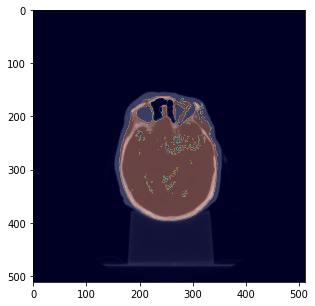

In [ ]:
plotmaster2(1, 11, fh=5, fw=5)

In [ ]:
## DATA CLEANING PIPELINE:

import nibabel as nib
from scipy import ndimage

def displayImgAndMask(idx):
    #train_data_path = os.path.join(data_path,'train')
    imageid = os.listdir(data_path)
    train_path = os.path.join(data_path,imageid[idx])
    img_path_main = os.path.join(train_path,'images')
    img_path = os.path.join(img_path_main,str(imageid[idx])+'.npy')
    masks_path_main = os.path.join(train_path,'masks')
    mask_path = os.path.join(masks_path_main,'mask.npy')
    seedcsv = os.path.join(train_path,'seeds.csv')
    seednpy = os.path.join(train_path,'seeds.npy')
    return img_path, mask_path, seednpy, seedcsv

def load_train_data(n):
    impath = displayImgAndMask(n)[0]
    maskpath = displayImgAndMask(n)[0]
    snp = displayImgAndMask(n)[0]
    imgs_train = np.load(impath)
    imgs_train_mask = np.load(maskpath)
    seed_train = np.load(snp)
    return imgs_train,imgs_train_mask, seed_train

def resize_volume(img):
    depth = img.shape[-1] / 41
    width = img.shape[0] / 512
    height = img.shape[1] / 512
    depth_factor = 1 / depth
    width_factor = 1 / width
    height_factor = 1 / height
    img = ndimage.zoom(img, (width_factor, height_factor, depth_factor), order=1)
    return img

def getinshape(img, mask):
  newarray = resize_volume(img)
  newmask = resize_volume(mask)
  return newarray, newmask

def normalize(image, MIN_BOUND, MAX_BOUND):
    image = (image - MIN_BOUND) / (MAX_BOUND - MIN_BOUND)
    image[image>1] = 1.
    image[image<0] = 0.
    return image

def preproceesing(path):
  k = len(os.listdir(path))
  imgs_train = []
  imgs_train_mask = []
  seed_train = []
  newimg = []
  newimg2 = []
  newmasklist = []
  for i in range(0,k):
    imgs_train1 ,imgs_train_mask1 , seed_train1 = load_train_data(i)
    imgs_train.append(imgs_train1)
    imgs_train_mask.append(imgs_train_mask1)
    seed_train.append(seed_train1)
  for j in range(0,k):
    newarray, newmask = getinshape(imgs_train[j], imgs_train_mask[j])
    newimg.append(newarray)
    newmasklist.append(newmask)
  for m in range(0, k):
    newimg2.append(normalize(newimg[m], -500, 500))
  return newimg2, newmasklist

### VISUALIZATION PIPELINE

def plotmaster(n, l, fh=5, fw=5):
  #imgs_train,imgs_train_mask, seed_train = newarray, newmask, 0
  image = newimg[n]
  mask = newmasklist[n]
  fig, ax = plt.subplots(figsize = (fh,fw))
  plt.imshow(image[:,:,l], cmap = 'gray')
  plt.imshow(mask[:,:,l]>0, cmap='jet', alpha=0.3)

def plotmasternorm(n, l, fh=5, fw=5):
  #imgs_train,imgs_train_mask, seed_train = newarray, newmask, 0
  image = newimg[n]
  mask = newmasklist[n]
  fig, ax = plt.subplots(figsize = (fh,fw))
  plt.imshow(image[:,:,l], cmap = 'gray')
  plt.imshow(mask[:,:,l]>500, cmap='jet', alpha=0.3)

In [ ]:
data_path = '/content/drive/MyDrive/MedHacks_Drive/Hackathon/AlphaTauDataset/training/'

In [ ]:
newimg, newmasklist = preproceesing(data_path)

KeyboardInterrupt: ignored

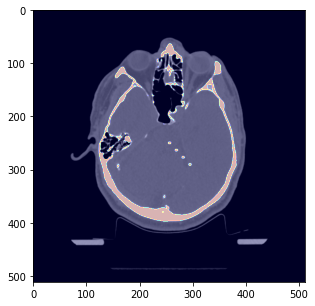

In [ ]:
plotmasternorm(1, 25, fh=5, fw=5)

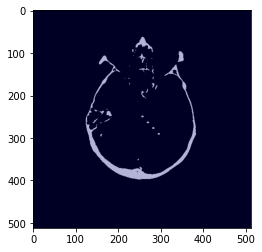

In [ ]:
l = 25
plt.imshow(newimg[1][:,:,l]>0.99, cmap = 'gray')
plt.imshow(newimg[1][:,:,l]>500, cmap='jet', alpha=0.3)

(array([8036643.,   42191.,   35412.,  275334.,  670203., 1547894.,
          41584.,   23533.,   16353.,   58757.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

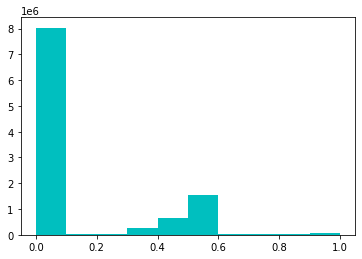

In [ ]:
plt.hist(newimg[5].flatten(), color='c')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

r = newimg[1][:,:,25]

# Find contours at a constant value of 0.8
contours = measure.find_contours(r, 0.99)

# Select the largest contiguous contour
contour = sorted(contours, key=lambda x: len(x))

contour

error: ignored

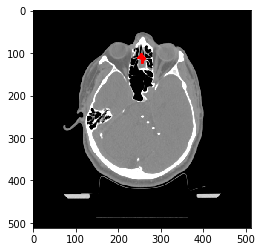

In [ ]:
# Display the image and plot the contour
fig, ax = plt.subplots()
ax.imshow(r, interpolation='nearest', cmap=plt.cm.gray)
X, Y = ax.get_xlim(), ax.get_ylim()
ax.step(contour.T[1], contour.T[0], linewidth=2, c='r')
ax.set_xlim(X), ax.set_ylim(Y)
plt.show()

In [ ]:
import cv2
thresh = cv2.threshold(gray,4,255,0)[1]

# apply morphology open to smooth the outline
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# find contours
cntrs = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]

# Contour filtering to get largest area
area_thresh = 0
for c in cntrs:
    area = cv2.contourArea(c)
    if area > area_thresh:
        area = area_thresh
        big_contour = c

# draw the contour on a copy of the input image
results = img.copy()
cv2.drawContours(results,[big_contour],0,(0,0,255),2)